In [224]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import mlab
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

In [225]:
df = pd.read_csv("wms.csv", sep=",")
df.columns = [
    "client_id",
    "date",
    "time",
    "temparature",
    "pressure",
    "humidity",
    "wind_speed",
    "wind_direction",
    "rain",
]

In [226]:
df.wind_speed = df.wind_speed.replace("wwww", "0")

In [227]:
df.wind_speed = df.wind_speed.astype(float).head(n=5)

In [228]:
df.head(5)

,client_id,date,time,temparature,pressure,humidity,wind_speed,wind_direction,rain
0,10101,2016-10-13,12:48:16,2747.0,91061.0,4265.0,1.00,150.0,111111.0
1,10101,2016-10-13,12:54:56,2747.0,91035.0,4275.0,7.14,40.0,111111.0
2,10101,2016-10-13,12:57:16,2747.0,91044.0,4258.0,8.83,335.0,111111.0
3,10101,2016-10-13,12:59:26,2747.0,91040.0,7253.0,9.38,330.0,111111.0
4,10101,2016-10-13,13:06:16,2747.0,91022.0,4252.0,6.24,185.0,111111.0


In [229]:
df[['temparature', 'pressure', 'humidity', 'wind_speed', 'wind_direction', 'rain']] = df[['temparature', 'pressure', 'humidity', 'wind_speed', 'wind_direction', 'rain']].apply(pd.to_numeric)

In [230]:
df.describe()

,client_id,temparature,pressure,humidity,wind_speed,wind_direction,rain
count,1678.0,1677.000000,1668.000000,1678.000000,5.0000,1678.000000,1677.000000
mean,10101.0,2568.403101,111061.177050,4721.179118,6.5180,152.473021,80394.888849
std,0.0,541.269877,101565.629728,949.395945,3.3335,296.495726,46368.228269
min,10101.0,2.000000,1.000000,-699.000000,1.0000,-3.000000,0.000000
25%,10101.0,2537.000000,91031.750000,4474.000000,6.2400,1.000000,11111.000000
50%,10101.0,2747.000000,91175.000000,4563.000000,7.1400,192.000000,111111.000000
75%,10101.0,2747.000000,91272.000000,5657.000000,8.8300,282.000000,111111.000000
max,10101.0,6040.000000,599109.000000,7253.000000,9.3800,11111.000000,111111.000000


In [231]:
rain = df['rain']
rain.head(5)

0    111111.0
1    111111.0
2    111111.0
3    111111.0
4    111111.0
Name: rain, dtype: float64

In [232]:
from dateutil.parser import parse
df['date'] = df['date'].apply(parse)

In [233]:
# df_date_year = df['date'].apply(lambda x: x.strftime("%Y"))
# df_date_year.head(5)
df_temp_date = df['date']
df_date = df['date'].apply(lambda x: x.strftime("%Y"))
df_month = df['date'].apply(lambda x: x.strftime("%m"))
df['date'] = df_date

In [234]:
df_date_mean = df.groupby(['date'], axis=0).mean().reset_index()

In [235]:
df_date_mean

,date,client_id,temparature,pressure,humidity,wind_speed,wind_direction,rain
0,2002,10101,2742.583333,91164.666667,5243.291667,NaN,9.083333,111111.000000
1,2016,10101,2587.366225,91111.679232,4750.294176,6.518,161.230311,86673.913907
2,2017,10101,2338.930070,341295.819549,4325.909510,NaN,84.005105,8936.745455


In [236]:
df_mean_year = [i for i in df_date_mean['date']]
df_mean_rain = [float("{:2.2f}".format(i)) for i in df_date_mean['rain']]

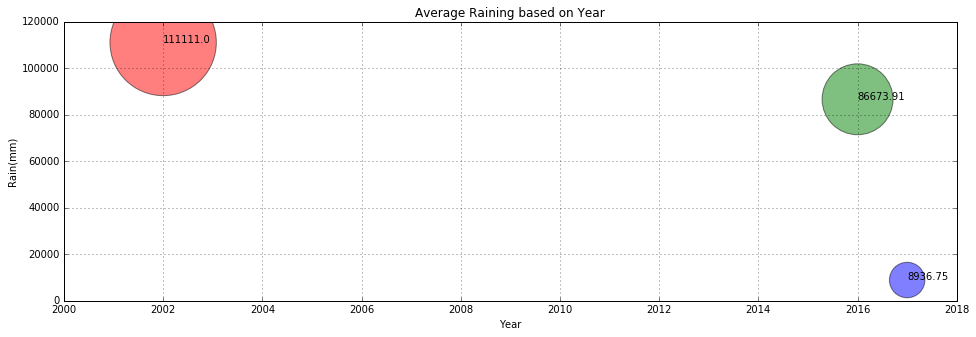

In [237]:
area = np.pi * (20 * np.array([3, 2, 1]))**2
colors = ("red", "green", "blue")
fig, ax = plt.subplots(figsize=(16, 5))
ax.scatter(df_mean_year, df_mean_rain, c = colors, s=area, alpha=0.5)
for i, j in zip(df_mean_year, df_mean_rain):
    ax.annotate(str(j), xy=(i, j))
ax.set_title('Average Raining based on Year')
ax.set_xlabel('Year')
ax.set_ylabel('Rain(mm)')
ax.grid(True)

plt.show()

In [238]:
df.head(10)

,client_id,date,time,temparature,pressure,humidity,wind_speed,wind_direction,rain
0,10101,2016,12:48:16,2747.0,91061.0,4265.0,1.00,150.0,111111.0
1,10101,2016,12:54:56,2747.0,91035.0,4275.0,7.14,40.0,111111.0
2,10101,2016,12:57:16,2747.0,91044.0,4258.0,8.83,335.0,111111.0
3,10101,2016,12:59:26,2747.0,91040.0,7253.0,9.38,330.0,111111.0
4,10101,2016,13:06:16,2747.0,91022.0,4252.0,6.24,185.0,111111.0
5,10101,2016,13:13:06,2747.0,91009.0,4191.0,NaN,100.0,111111.0
6,10101,2016,13:15:17,2747.0,91012.0,4091.0,NaN,120.0,111111.0
7,10101,2016,13:22:17,2747.0,91004.0,4077.0,NaN,130.0,111111.0
8,10101,2016,13:24:17,2747.0,91010.0,4084.0,NaN,305.0,111111.0
9,10101,2016,13:26:37,2747.0,91013.0,4040.0,NaN,285.0,111111.0


In [239]:
df_humidity = df['humidity'].apply(int)
df_humidity.head()

0    4265
1    4275
2    4258
3    7253
4    4252
Name: humidity, dtype: int64

In [240]:
df_humidity = df_humidity.apply(lambda x: x * 0.01)

In [241]:
df2 = df

In [242]:
df2.head()

,client_id,date,time,temparature,pressure,humidity,wind_speed,wind_direction,rain
0,10101,2016,12:48:16,2747.0,91061.0,4265.0,1.00,150.0,111111.0
1,10101,2016,12:54:56,2747.0,91035.0,4275.0,7.14,40.0,111111.0
2,10101,2016,12:57:16,2747.0,91044.0,4258.0,8.83,335.0,111111.0
3,10101,2016,12:59:26,2747.0,91040.0,7253.0,9.38,330.0,111111.0
4,10101,2016,13:06:16,2747.0,91022.0,4252.0,6.24,185.0,111111.0


In [243]:
df2.date = df_temp_date

In [244]:
df2.date.head()

0   2016-10-13
1   2016-10-13
2   2016-10-13
3   2016-10-13
4   2016-10-13
Name: date, dtype: datetime64[ns]

In [245]:
df2.head()

,client_id,date,time,temparature,pressure,humidity,wind_speed,wind_direction,rain
0,10101,2016-10-13,12:48:16,2747.0,91061.0,4265.0,1.00,150.0,111111.0
1,10101,2016-10-13,12:54:56,2747.0,91035.0,4275.0,7.14,40.0,111111.0
2,10101,2016-10-13,12:57:16,2747.0,91044.0,4258.0,8.83,335.0,111111.0
3,10101,2016-10-13,12:59:26,2747.0,91040.0,7253.0,9.38,330.0,111111.0
4,10101,2016-10-13,13:06:16,2747.0,91022.0,4252.0,6.24,185.0,111111.0


In [246]:
df2.isnull().values.any()

True

In [247]:
df2.dropna(how="any", axis=0)

,client_id,date,time,temparature,pressure,humidity,wind_speed,wind_direction,rain
0,10101,2016-10-13,12:48:16,2747.0,91061.0,4265.0,1.00,150.0,111111.0
1,10101,2016-10-13,12:54:56,2747.0,91035.0,4275.0,7.14,40.0,111111.0
2,10101,2016-10-13,12:57:16,2747.0,91044.0,4258.0,8.83,335.0,111111.0
3,10101,2016-10-13,12:59:26,2747.0,91040.0,7253.0,9.38,330.0,111111.0
4,10101,2016-10-13,13:06:16,2747.0,91022.0,4252.0,6.24,185.0,111111.0


In [248]:
df2['humidity'].isnull().values.any()

False

In [252]:
df2 = df2[df2.humidity > 0]
df2 = df2[(df2['date'] > '2017-01-01') & (df2['date'] < '2017-12-30')]
df2.head()

,client_id,date,time,temparature,pressure,humidity,wind_speed,wind_direction,rain
1535,10101,2017-04-10,17:18:37,2537.0,91192.0,4618.0,NaN,1.0,11111.0
1536,10101,2017-04-10,15:18:37,2837.0,91192.0,4718.0,NaN,1.0,11111.0
1537,10101,2017-04-11,15:18:37,2837.0,93192.0,4718.0,NaN,1.0,11111.0
1538,10101,2017-04-11,14:18:37,2837.0,93192.0,4718.0,NaN,1.0,11111.0
1539,10101,2017-04-12,15:18:37,2237.0,93192.0,4418.0,NaN,1.0,11111.0


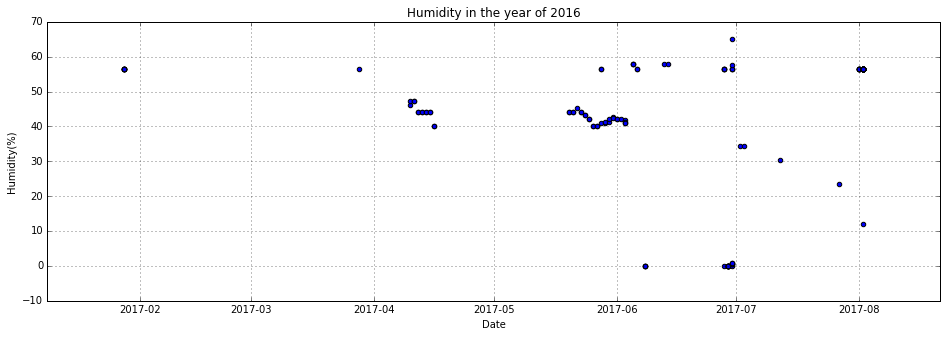

In [256]:
df2_humi = pd.Series(df2.humidity.apply(lambda x: x * 0.01))
df2_date = pd.Series(df2.date)

df2_humidity = pd.Series(df2_hum, index=df2_date)
fig, ax = plt.subplots(figsize=(16, 5))
ax.scatter(df2_humidity.index, df2_humi)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.set_title('Humidity in the year of 2016')
ax.set_xlabel('Date')
ax.set_ylabel('Humidity(%)')
ax.grid(True)
plt.show()